<a href="https://colab.research.google.com/github/ptran1203/pytorch-animeGAN/blob/master/notebooks/animeGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
import torch

repo = "Pytorch-animeGAN"
%cd "/content"
!rm -rf {repo}
!git clone https://github.com/ptran1203/{repo}
%cd {repo}
output.clear()

## Inference Image

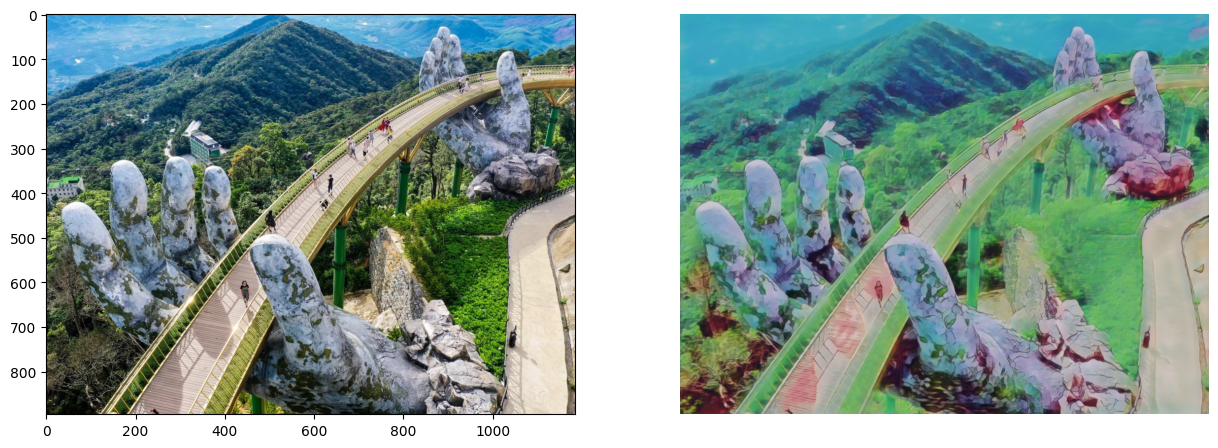

In [5]:
import cv2
import random
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import read_image, resize_image
from inference import Predictor

predictor= Predictor('hayao:v2')

url = 'https://storage.googleapis.com/gweb-uniblog-publish-prod/images/image-VAHwqno5k7JFTg-Golden_Brid.width-1200.format-webp.webp'

predictor.transform_and_show(url, figsize=(18, 10))

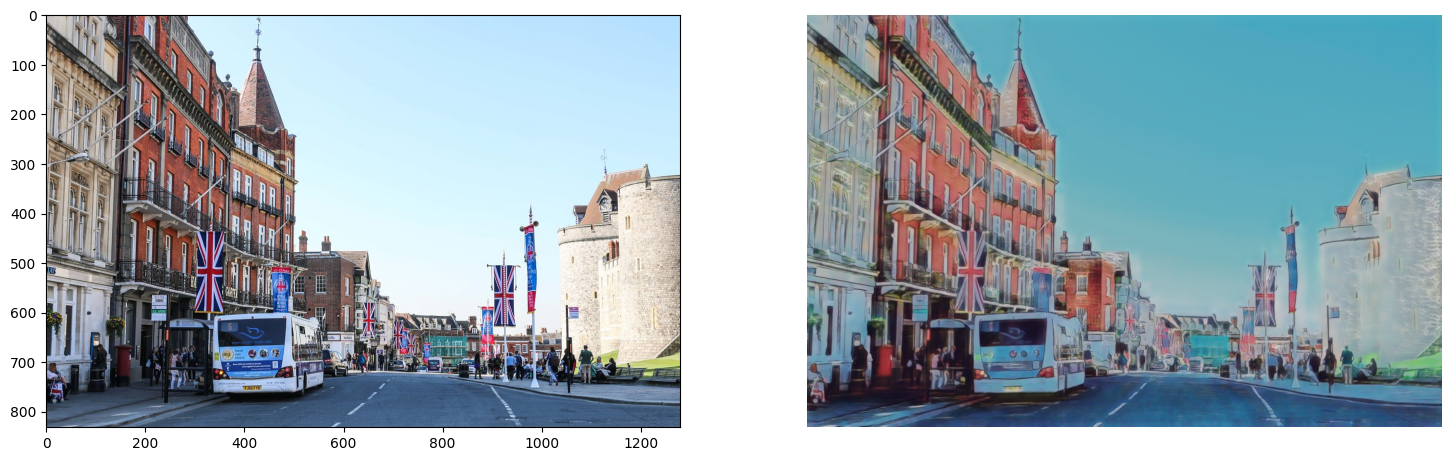

In [21]:
predictor.transform_and_show(
    "https://github.com/ptran1203/pytorch-animeGAN/blob/master/example/result/real/1%20(20).jpg?raw=true",
    figsize=(18, 10)
)

## Inference Video

In [ ]:
!pip install -q pytube

In [ ]:
!pytube https://www.youtube.com/watch?v=Ac_bshzhI_M&pp=ygUNc2hvcnQgdHJhaWxlcg%3D%3D --resolution 360p --target /content/data

In [ ]:
# You will need to store your video to Drive, since colab dont effectively view the video
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!rm -rf /content/trailer_anime.mp4

In [ ]:
!python3 inference_video.py --weight hayao:v2\
                        --src '/content/Pytorch-animeGAN/Gina - Short Film Trailer.mp4'\
                        --out /content/trailer_anime.mp4\
                        --batch-size 8 --start 0 --end 100

In [ ]:
!cp /content/trailer_anime.mp4 /content/drive/MyDrive/trailer_anime.mp4